# Final notebook
### Jiaqi Li

In this notebook, I will be creating these main maps that contribute to the final project: Research Findings - Chapter 2: Spatial Consequences:

- Mapping of residential unit density changes in Chinatown, 2006-2021
- Layered mapping of total parcel land value changes and residential unit density changes in Chinatown, 2006-2021

as well as the side maps that contribute to the final project: appendix - commercial unit density to understand the spatial consequences of land development:

- Mapping of residential unit density changes in Chinatown, 2006-2021

#### Import libraries

We will first import the libraries needed, and bring the assessor-parcel data to the notebook repository.

In [1]:
# First importing our libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import contextily as ctx

#### Unit Density changes of residential and commercial buildings

In the following section, I will create static maps for unit density of residential buildings and commercial buildings in a four-year range to track changes from 2006 to 2021. The residential maps will go under the section of spatial changes to support our analysis, while the commercial maps will go under the section of appendix as references.

Specifically, we would like to focus on residential units to see if the number of residential types has increased over the years since the number of residential units in the building is critical to understand the housing supply. If they are, this indicates that more multi-family housing or condo types have been constructed in the area. If the units in commercial buildings also increased, that will indicate the re-deveopment of the business industry in Chinatown. It means that the single-unit retail space that constituted daily life of Chinatown residents and dominated the area before, will now be displaced.

Therefore, we first define two dataframes for residential buildings and commercial buildings respectivley.

In [2]:
parcel_dataframe_residential = []
parcel_dataframe_commercial = []

Then we import the parcel data and create dataframes for each type. We awould also check the dataframe of these two types to see if they works.

In [3]:
yearframe = [2006, 2010, 2014, 2018, 2021]  # define the five years of the dataset we want
for year in yearframe:
    parcel_data_filepath1 = "Assessor_Parcels_Data_" + str(year) + "_TRA.geojson"
    parcel_dataframe_raw1 = gpd.read_file(parcel_data_filepath1) # read all datasets and combine them
    columns_to_keep = ['UseType','YearBuilt','Units','geometry'] # define columns to keep
    parcel_residential = parcel_dataframe_raw1[columns_to_keep].copy() # define the columns to keep for the residential type
    parcel_residential = parcel_residential[parcel_dataframe_raw1.UseType == 'Residential']
    parcel_commercial = parcel_dataframe_raw1[columns_to_keep].copy()  # define the columns to keep for the commercial type
    parcel_commercial = parcel_commercial[parcel_dataframe_raw1.UseType == 'Commercial']
    parcel_residential['Year'] = year
    parcel_commercial['Year'] = year
    parcel_dataframe_residential.append(parcel_residential) 
    parcel_dataframe_commercial.append(parcel_commercial)
    
print(parcel_dataframe_residential[0].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 544 entries, 1 to 1094
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   UseType    544 non-null    object  
 1   YearBuilt  544 non-null    int64   
 2   Units      544 non-null    int64   
 3   geometry   544 non-null    geometry
 4   Year       544 non-null    int64   
dtypes: geometry(1), int64(3), object(1)
memory usage: 25.5+ KB
None


In [4]:
print(parcel_dataframe_commercial[0].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 333 entries, 0 to 1092
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   UseType    333 non-null    object  
 1   YearBuilt  333 non-null    int64   
 2   Units      333 non-null    int64   
 3   geometry   333 non-null    geometry
 4   Year       333 non-null    int64   
dtypes: geometry(1), int64(3), object(1)
memory usage: 15.6+ KB
None


In the above codes, I have created two dataframes for the residential-selected parcel data and the commercial-selected parcel data respectively. I only want the information in five year-points and specific columns, so I eliminated the unwanted information. I also checked whether the dataframes produced are the dataframes that I wanted.

Next，I want to choose a base map for my maps. I tested which base map is better to highlight the spatial changes.

In [5]:
print(ctx.providers.Stamen.keys())

dict_keys(['Toner', 'TonerBackground', 'TonerHybrid', 'TonerLines', 'TonerLabels', 'TonerLite', 'Watercolor', 'Terrain', 'TerrainBackground', 'TerrainLabels', 'TopOSMRelief', 'TopOSMFeatures'])


In the next two code cells, I will create two loop to print out five maps, respectively for residential building type and commercial building type, to document the unit number changes over the years. In the end of each cell, I will also exported the maps into jpg file for the mid-term presentation.

##### Residential

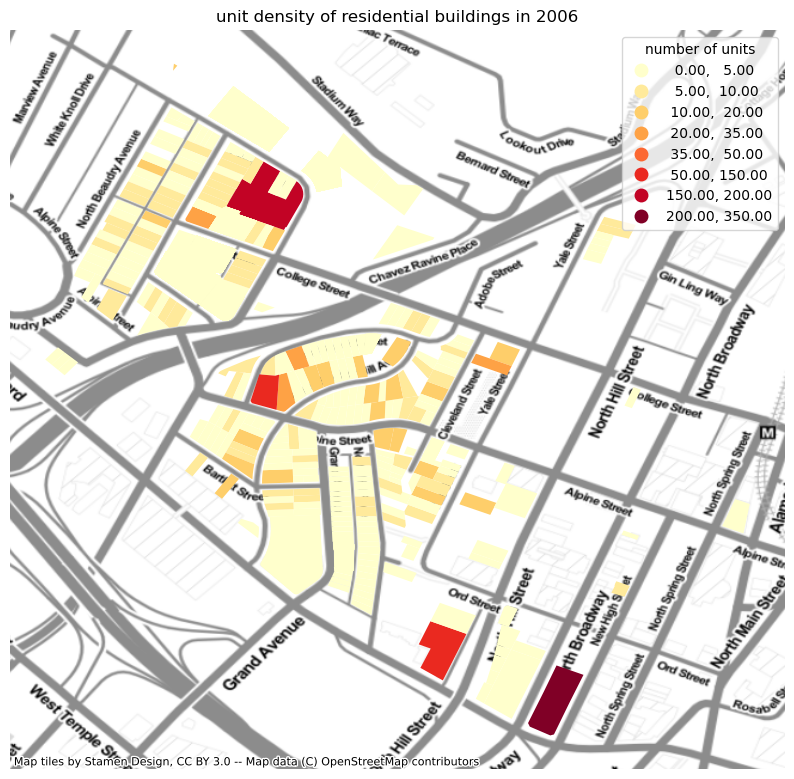

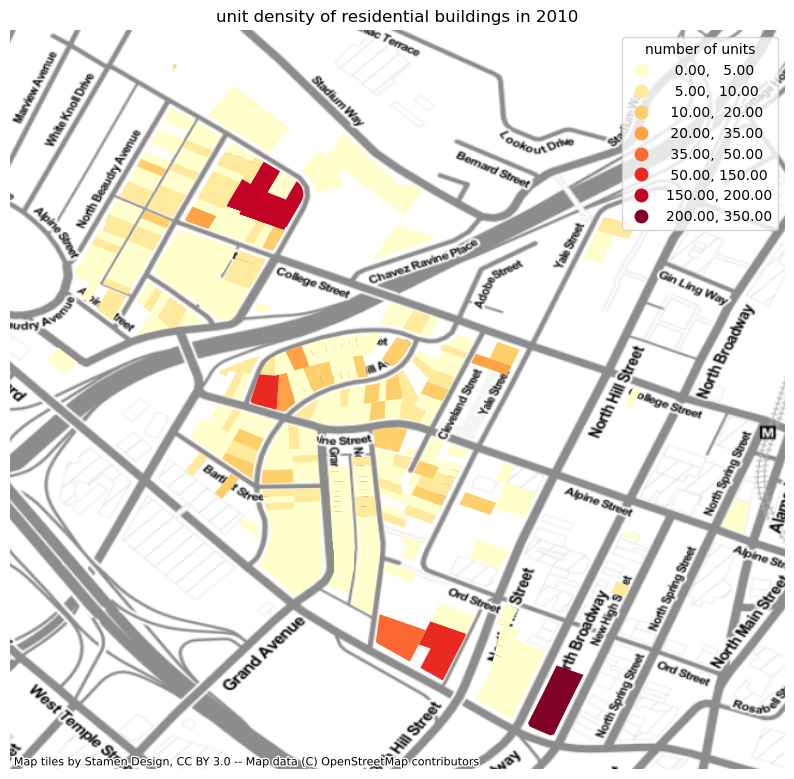

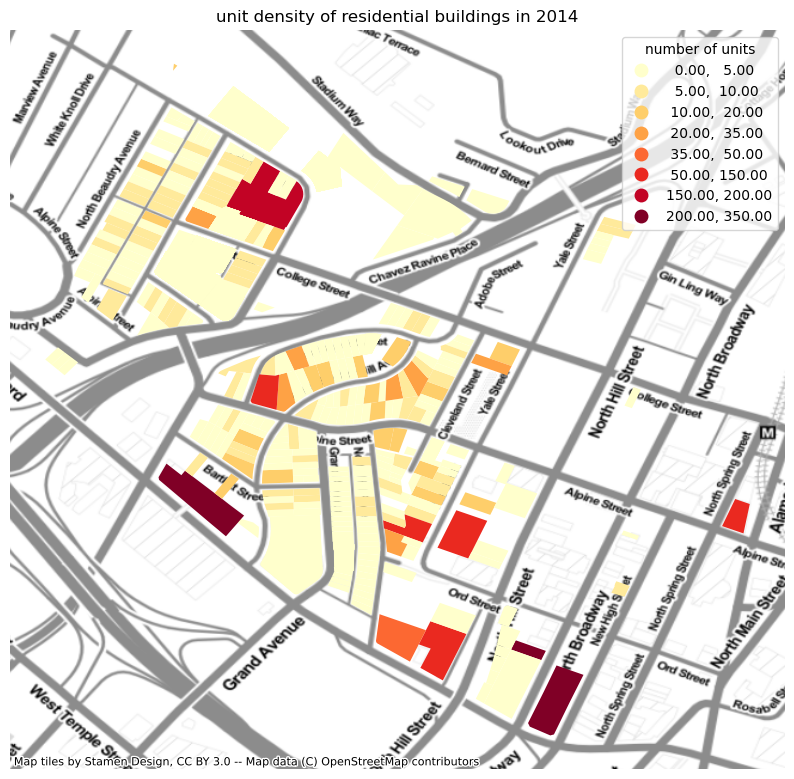

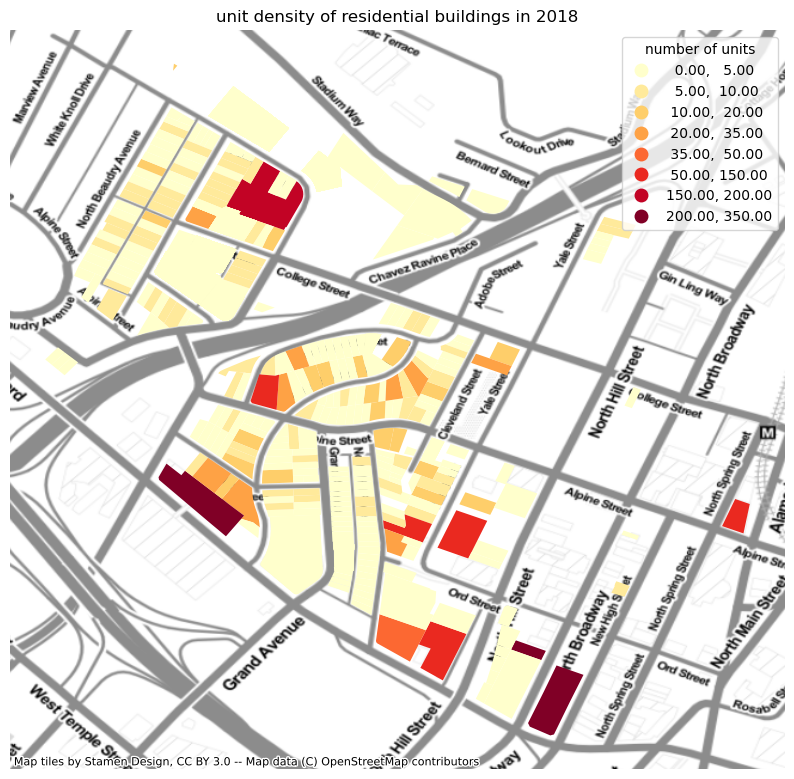

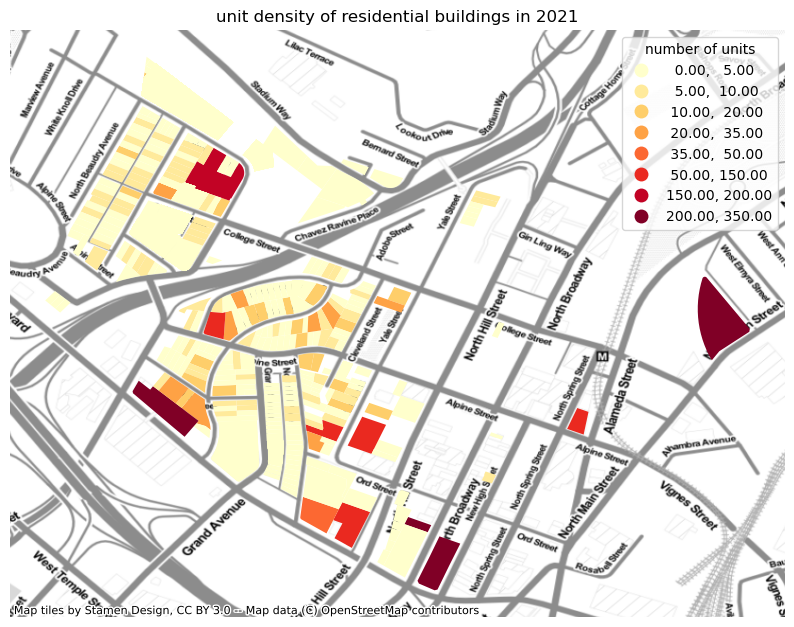

In [6]:
# Create a loop to print out all five maps for unit numbers of the residential type

for parcel_dataframe in parcel_dataframe_residential:
    fig, ax = plt.subplots(figsize=(10,10))
    parcel_dataframe.plot(ax=ax,
                column='Units',cmap='YlOrRd',
                legend=True, 
                scheme='userdefined',
                         legend_kwds={'title': "number of units", 'loc': 0,},
                        classification_kwds=dict(bins=[5,10,20,35,50,150,200,350]))
    ax.set_title('unit density of residential buildings in '+str(parcel_dataframe['Year'][1]))
    ax.axis('off')
    
    ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite,crs=4326)
    # plt.savefig('residentialunit' + str(parcel_dataframe['Year'][1]) + '.jpg')
    # Uncomment the line of code above if maps in jpg need to be exported

I would also want to create a gif for residential unit density maps. I create a list for them and produce the gif.

In [7]:
import imageio.v2 as imageio
# unitmapsR = ['residentialunit2006.jpg','residentialunit2010.jpg','residentialunit2014.jpg', 'residentialunit2018.jpg','residentialunit2021.jpg']

# images = []
# for unitmap in unitmapsR:
    # images.append(imageio.imread(unitmap))
# imageio.mimsave('Runit.gif',images,duration=1)   
# Uncomment the codes above if maps in gif need to be exported

##### Commercial

Now I will apply the same process to create maps for commercial type.

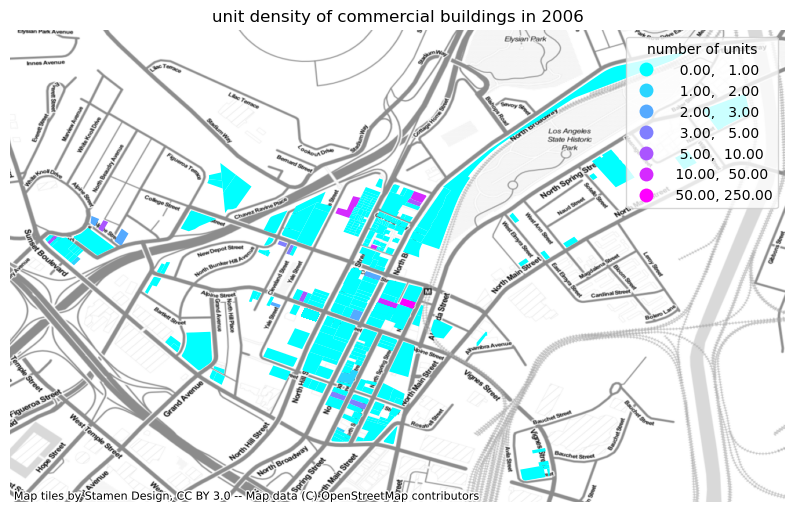

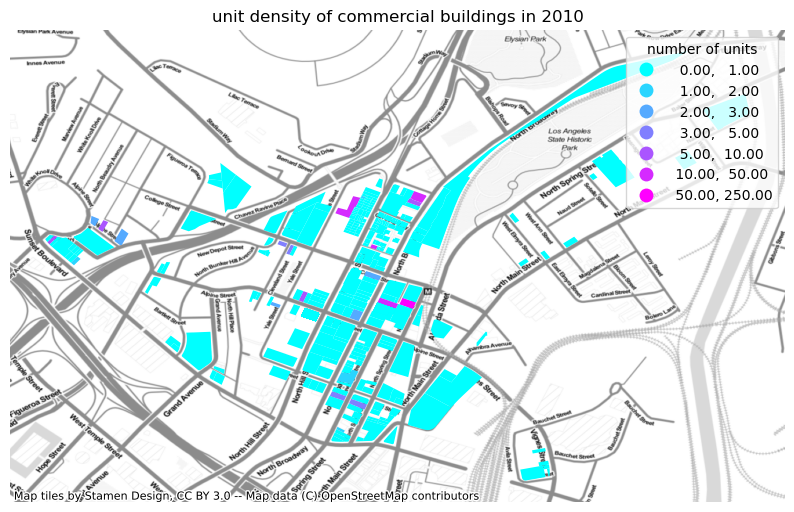

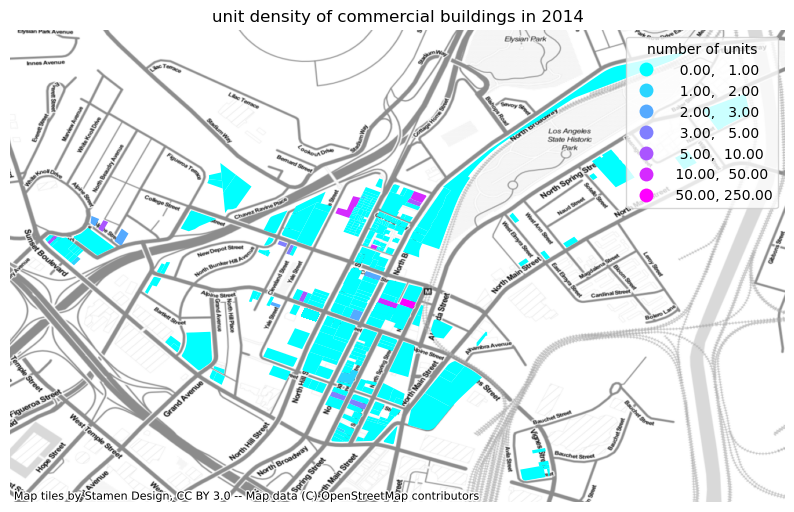

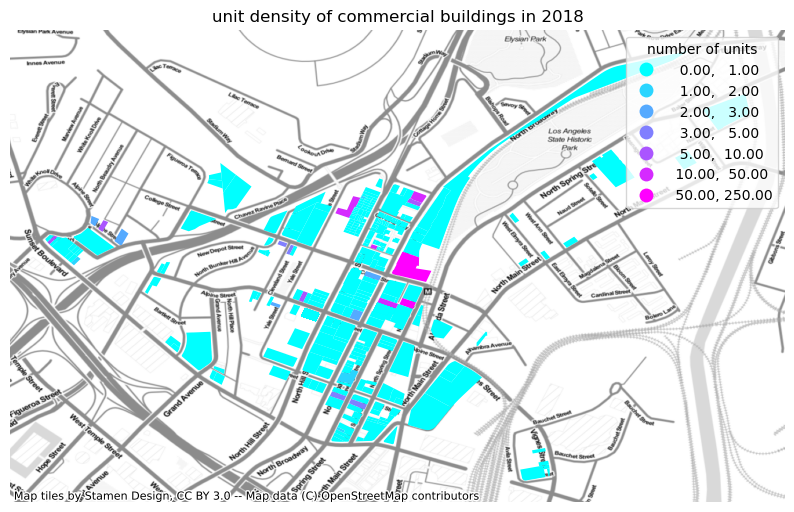

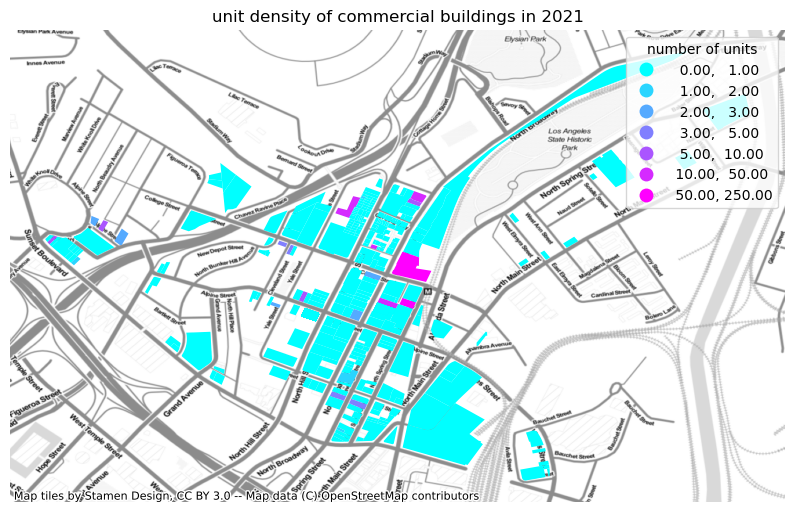

In [8]:
# Create a loop to print out all five maps for unit numbers of the commercial type

for parcel_dataframe in parcel_dataframe_commercial:
    fig, ax = plt.subplots(figsize=(10,10))
    parcel_dataframe.plot(ax=ax,
                column='Units',cmap='cool',
                legend=True, 
                scheme='userdefined',
                         legend_kwds={'title': "number of units", 'loc': 0,},
                        classification_kwds=dict(bins=[1,2,3,5,10,50,250]))
    ax.set_title('unit density of commercial buildings in '+str(parcel_dataframe['Year'][0]))
    ax.axis('off')
    
    ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite,crs=4326)
    # plt.savefig('commercialunit' + str(parcel_dataframe['Year'][0]) + '.jpg')
        # Uncomment the line of code above if maps in jpg need to be exported

I would also want to create a gif for residential unit density maps. I create a list for them and produce the gif.

In [9]:
import imageio.v2 as imageio
#unitmapsC = ['commercialunit2006.jpg','commercialunit2010.jpg','commercialunit2014.jpg', 'commercialunit2018.jpg','commercialunit2021.jpg']

#images = []
#for unitmap in unitmapsC:
    #images.append(imageio.imread(unitmap))
#imageio.mimsave('Cunit.gif',images,duration=1)
    # Uncomment codes above if maps in gif need to be exported

#### Layering the maps of total parcel land value changes and the residential unit density changes together

In the following section, we find it more compelling if we can show the correlation between residential unit density and total parcel values. Therefore, I map these two layers of information together to see if the actual residential unit changes match the increased parcel values over years. If the increase in total parcel land value and the increase in residential unit density is closely related, it means that increase in both residential unit density and parcel land values indicate the land develpment and gentrifcation in Chinatown, and this prepares for our analysis of 'impacts on renters' in research findings.

First I will reproduce the maps based on my group member - Clara's codes, but keep the columns related to residential units since I want to layer those information together.

In [10]:
columns_to_keep = ['TotalValue','geometry','LandValue','UseType','Units','YearBuilt']

Then, I will a for loop to grasp the information for our base map. Total parcel land value map will be our base maps.

In [11]:
# Create an array of all years of assessor data using for loop
parcel_dataframes = []

yearframe = [2006, 2010, 2014, 2018, 2021]  # define the five years of the dataset we want
for year in yearframe:
    parcel_data_filepath = "Assessor_Parcels_Data_" + str(year) + "_TRA.geojson"
    parcel_dataframe_raw = gpd.read_file(parcel_data_filepath)
    parcel_dataframe = parcel_dataframe_raw[columns_to_keep].copy()
    parcel_dataframe['Year'] = year
    parcel_dataframes.append(parcel_dataframe)
    parcel_dataframe['TotalValue'] = parcel_dataframe['TotalValue'].div(1000)

print(parcel_dataframes[0].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TotalValue  1095 non-null   float64 
 1   geometry    1095 non-null   geometry
 2   LandValue   1095 non-null   float64 
 3   UseType     1092 non-null   object  
 4   Units       1095 non-null   int64   
 5   YearBuilt   1095 non-null   int64   
 6   Year        1095 non-null   int64   
dtypes: float64(2), geometry(1), int64(3), object(1)
memory usage: 60.0+ KB
None


Now that we have the relevant information, we will first print out all maps for Total parcel land values as our base maps. However, note that in the following section of codes, I keep the residental unit density data. 

For residential unit density data, I abandon the 'filled-color' mapping technique in previous section, but identify the centroid of each residential building poloygon, and identify them as dots on the maps. All the other color-coding remain the same as in previous section.

In this way, I will be able to identify the location of those residential units that have a unit density increase, and map this information on top of the maps of total parcel land value chanages. Since we are mainly focusing on multi-family unit construction or other multi-unit development like condo, we trim the data and only query for those with more than 20 units in the buildings.

Note that there will warning messages after running the codes, because it says that this method of getting the controid of the residential building polygon may not be accurate. However, by comparing these new layered maps with the ones we created in the previous section, we can say that it is still pretty obvious and accurate.

/tmp/ipykernel_649/3287439139.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parcel_dataframe_point['geometry'] = parcel_dataframe_point['geometry'].centroid # Grasph the controid of each residential building polygon
/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_649/3287439139.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parcel_dataframe_poi

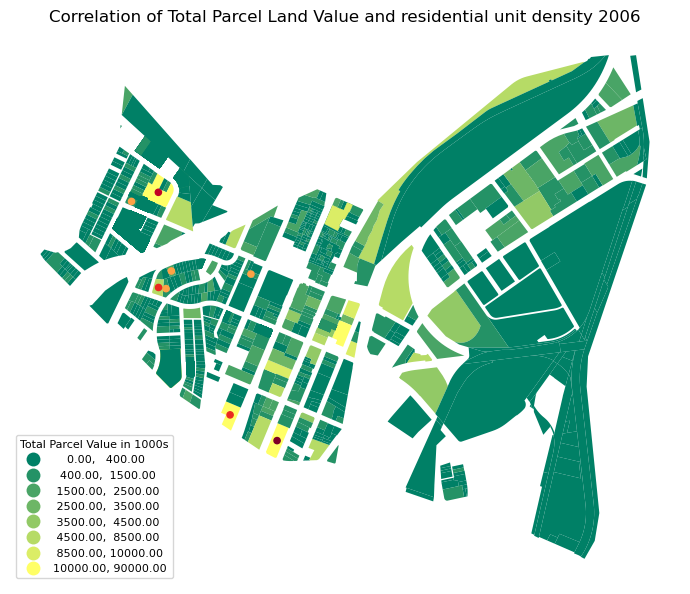

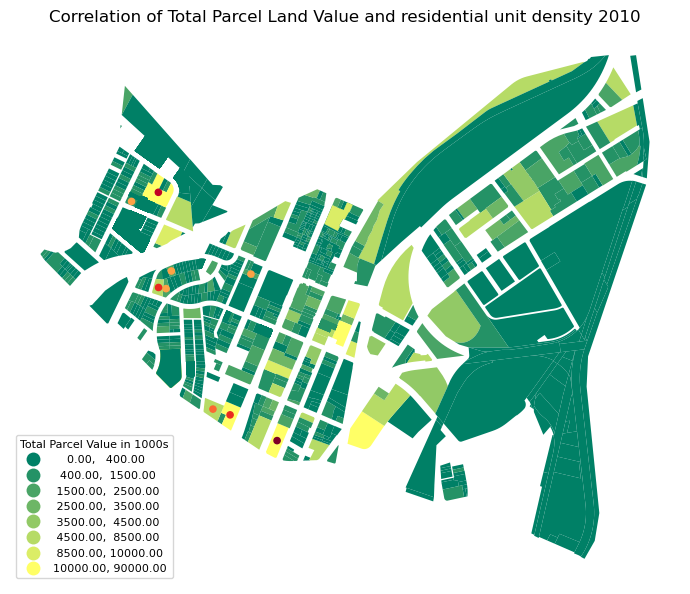

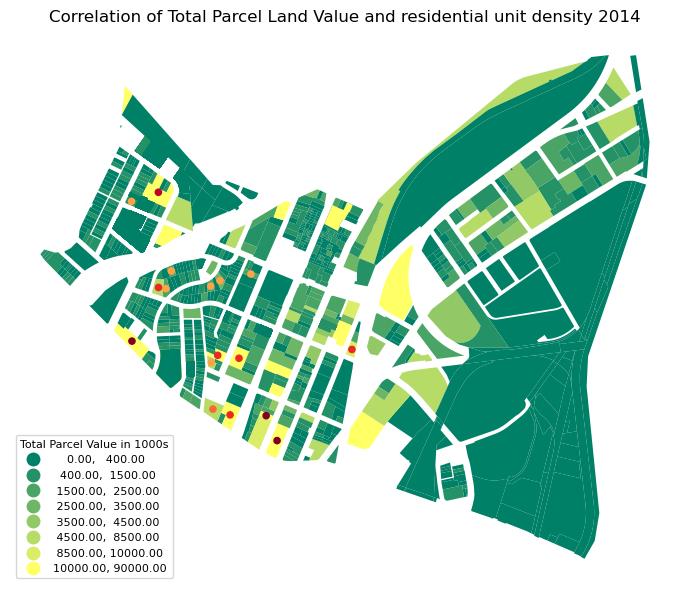

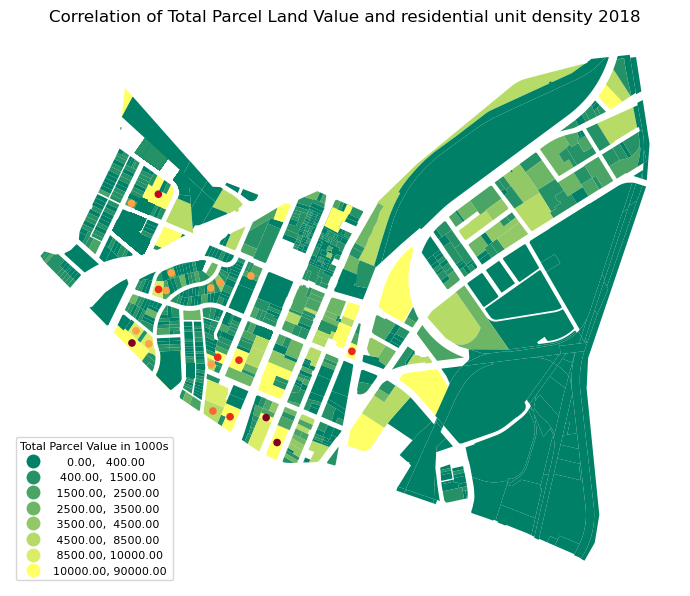

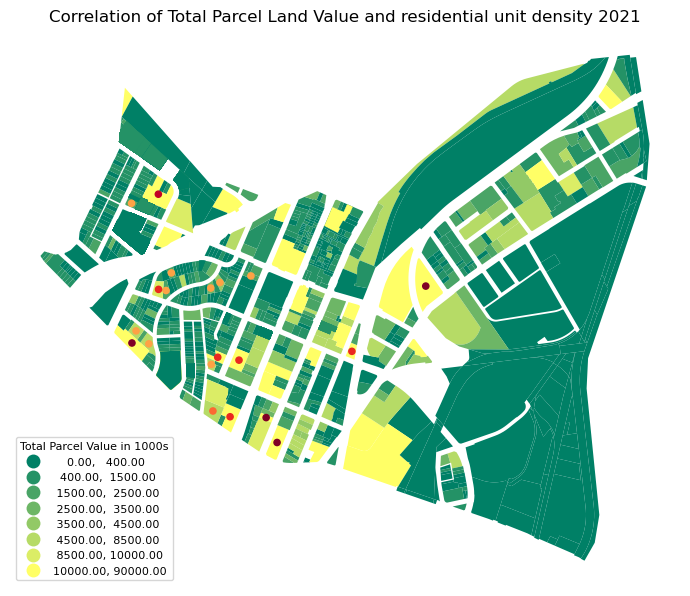

In [12]:
# Now create for loop to print out all maps for Total Value

for parcel_dataframe in parcel_dataframes:
    
    parcel_dataframe_point=parcel_dataframe[(parcel_dataframe.UseType=='Residential') & (parcel_dataframe.Units>20)]

    parcel_dataframe_point['geometry'] = parcel_dataframe_point['geometry'].centroid # Grasph the controid of each residential building polygon
    
    fig, ax = plt.subplots(figsize=(7,7))
    parcel_dataframe.plot(ax=ax,
                          column='TotalValue', cmap='summer',
                          legend=True,
                       scheme='userdefined',
                      legend_kwds={'title': "Total Parcel Value in 1000s", 'prop': {'size': 8}, 'title_fontsize': 8, 'loc': 'lower left'},
                  classification_kwds=dict(bins=[400,1500,2500,3500,4500,8500,10000,90000]))
    
    parcel_dataframe_point.plot(ax=ax, figsize=(10,10),
               cmap='YlOrRd',
               markersize=20, column='Units',legend=False, 
                scheme='userdefined',
                         legend_kwds={'title': "number of units", 'loc': 0,},
                        classification_kwds=dict(bins=[5,10,20,35,50,150,200,350]))
    
    ax.set_title('Correlation of Total Parcel Land Value and residential unit density ' +str(parcel_dataframe['Year'][0] ))
    ax.axis('off')
    
    plt.tight_layout()
    
    
    #plt.savefig('correlation' + str(parcel_dataframe['Year'][1]) + '.jpg', dpi=199)
   # Uncomment the code line above to save each map produced to Jupyter notebook folder 

##### Analysis of the new layered map

In 2006, there was a bare minimum number of buildings that have more than 20 residential units. However, buildings that have more residential units were constructed like bamboo after rain in 2014, one year after the CASP was introduced in 2013. Total Parcel Land Value increased significantly in 2014 at the same time. 

From a long-term perspective, we can see that the location of residential buildings that have a higher unit density (especially those that have more than 50 units, the red dots on the maps) matches the value-increased parcel land (the yellow areas on the maps). 

In [13]:
import imageio.v2 as imageio
#correlation = ['correlation2006.jpg','correlation2010.jpg','correlation2014.jpg', 'correlation2018.jpg','correlation2021.jpg']

#images = []
#for correlation in correlation:
    #images.append(imageio.imread(correlation))
#imageio.mimsave('correlation.gif',images,duration=1)
# Uncomment the codes above to save the gif produced to Jupyter notebook folder 

## Conclusion

Real-estate developers have taken every opportunity to occupy vacant land that once lacked parcel value and transform them into valuable sites that support the development of multi-unit housing. 

In the maps of demographic changes/rental prices/renter information produced by my group members in other sections, we will see that the increased unit density does not really meet the original resident’s housing demand, since very limited affordable housing is provided as the total parcel land value increases in a really fast speed. As a result, vulnerable populations are forced to leave Chinatown and such brutal change is reflected in the demographic changes over years of interest.